In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import seaborn as sns
import os
import matplotlib.pyplot as plot
import cv2
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import tarfile

with tarfile.open('/content/drive/My Drive/Colab Notebooks/test_set.tar.xz') as f1:
    f1.extractall('.')
    
with tarfile.open('/content/drive/My Drive/Colab Notebooks/train.tar.xz') as f2:
    f2.extractall('.')

In [ ]:
def get_images(directory):
    Images = []
    Labels = []  

 
    for labels in os.listdir(directory):
        if os.path.isdir(directory+labels):
            if labels == 'basketball_court': 
                label = 0
            elif labels == 'beach':
                label = 1
            elif labels == 'forest':
                label = 2
            elif labels == 'railway':
                label = 3
            elif labels == 'tennis_court':
                label = 4
            elif labels == 'swimming_pool':
                label = 5
            elif labels == 'others':
                label = 6

            for image_file in os.listdir(directory+labels): 
                image = cv2.imread(directory+labels+'/'+image_file)
                image = cv2.resize(image,(256,256)) 
                Images.append(image)
                Labels.append(label)
        
        else:
    
            for image_file in os.listdir(directory): 
                image = cv2.imread(directory+'/'+image_file) 
                image = cv2.resize(image,(256,256)) 
                Images.append(image)

    return Images,Labels

def get_classlabel(class_code):
    labels = {0:'basketball_court', 1:'beach', 2:'forest', 3:'railway', 4:'tennis_court', 5:'swimming_pool', 6:'others'}
    return labels[class_code]


In [ ]:
Images, Labels = get_images('/content/train/') 

Images = np.array(Images) 
Labels = np.array(Labels)

print("Shape of Images array is:",Images.shape)
print("Shape of Labels array is:",Labels.shape)

Shape of Images array is: (560, 256, 256, 3)
Shape of Labels array is: (560,)


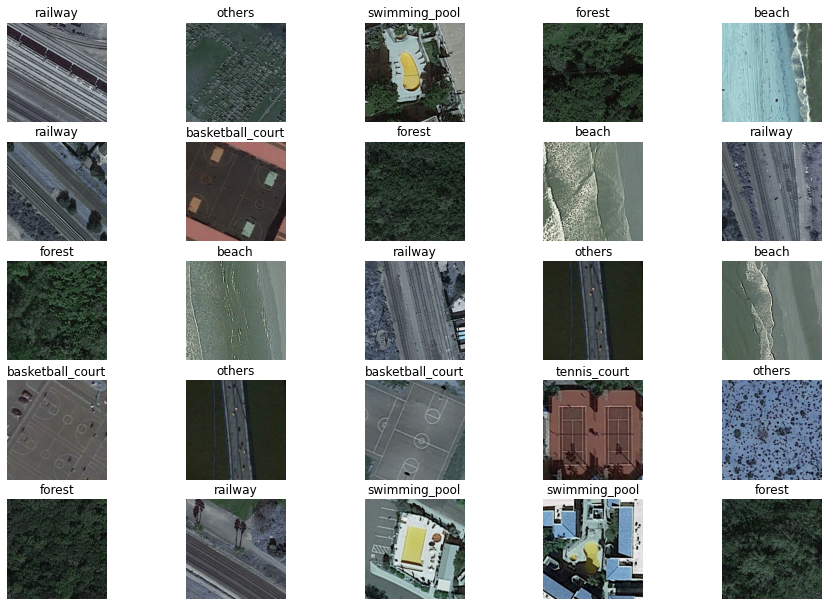

In [ ]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,2,2)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

In [ ]:
from sklearn.model_selection import train_test_split
import random as rn
x_train,x_test,y_train,y_test=train_test_split(Images,Labels,test_size=0.150) 
y_train = tf.keras.utils.to_categorical(y_train, 7)
y_test = tf.keras.utils.to_categorical(y_test, 7)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
datagen = ImageDataGenerator(
    rotation_range=60.,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range= 0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode = "reflect"
    
    )

datagen.fit(x_train)

In [ ]:
from keras.regularizers import l2
def createmodel():
    model = Models.Sequential()

    # 1st Convolutional Layer
    model.add(Layers.Conv2D(filters=64, kernel_size=(3,3),padding="Same",activation="relu" , input_shape = (256,256,3)))
    model.add(Layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Layers.BatchNormalization())
    model.add(Layers.Dropout(0.25))
    # 2nd Convolutional Layer
    model.add(Layers.Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
    model.add(Layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Layers.BatchNormalization())
    model.add(Layers.Dropout(0.25))
    # 3rd Convolutional Layer
    model.add(Layers.Conv2D(filters=256, kernel_size=(3,3),padding="Same",activation="relu"))
    model.add(Layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Layers.BatchNormalization())
    model.add(Layers.Dropout(0.25))
    # 4th Convolutional Layer
    model.add(Layers.Conv2D(filters=256,kernel_size = (3,3),padding="Same",activation="relu"))
    model.add(Layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Layers.BatchNormalization())
    model.add(Layers.Dropout(0.25))
    # 5th Convolutional Layer
    model.add(Layers.Conv2D(filters=512,kernel_size = (3,3),padding="Same",activation="relu"))
    model.add(Layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Layers.BatchNormalization())
    model.add(Layers.Dropout(0.25))

    model.add(Layers.Flatten())

    # 1st Fully Connected Layer
    model.add(Layers.Dense(512,activation="relu"))
    model.add(Layers.Dropout(0.1))
    model.add(Layers.BatchNormalization())

    # 2nd Fully Connected Layer
    model.add(Layers.Dense(512,activation="relu"))
    model.add(Layers.Dropout(0.1)) 
    model.add(Layers.BatchNormalization())
    # Add output layer
    model.add(Layers.Dense(7,activation="softmax"))
    return model

model1 = createmodel()
batch_size = 64

model1.summary()
SVG(model_to_dot(model1).create(prog='dot', format='svg'))
Utils.plot_model(model1,to_file='model.png',show_shapes=True)

model1.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 256, 256, 64)      1792      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 128, 128, 64)      256       
_________________________________________________________________
dropout_7 (Dropout)          (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 128)       0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 64, 64, 128)      

In [ ]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

red_lr= ReduceLROnPlateau(monitor='val_loss',patience=4,verbose=1,factor=0.1, mode='min', min_lr=10**(-12))
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_accuracy', mode='max')
epochs = 100
history = model1.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size), 
                        epochs=epochs, 
                        validation_data = (x_test,y_test),
                        verbose = 1,
                        steps_per_epoch=x_train.shape[0] // batch_size,
                        callbacks=[red_lr, mcp_save]
          )

Epoch 1/100
8/8 [==============================] - 8s 1s/step - loss: 1.5213 - accuracy: 0.5528 - val_loss: 429.2244 - val_accuracy: 0.1313
Epoch 2/100
8/8 [==============================] - 6s 775ms/step - loss: 0.6681 - accuracy: 0.7602 - val_loss: 228.1935 - val_accuracy: 0.1313
Epoch 3/100
8/8 [==============================] - 6s 775ms/step - loss: 0.5269 - accuracy: 0.7866 - val_loss: 158.7741 - val_accuracy: 0.1313
Epoch 4/100
8/8 [==============================] - 6s 776ms/step - loss: 0.5065 - accuracy: 0.8008 - val_loss: 79.6615 - val_accuracy: 0.1313
Epoch 5/100
8/8 [==============================] - 7s 859ms/step - loss: 0.4316 - accuracy: 0.8476 - val_loss: 38.7811 - val_accuracy: 0.2121
Epoch 6/100
8/8 [==============================] - 7s 820ms/step - loss: 0.3892 - accuracy: 0.8476 - val_loss: 47.8832 - val_accuracy: 0.1313
Epoch 7/100
8/8 [==============================] - 6s 775ms/step - loss: 0.3144 - accuracy: 0.8760 - val_loss: 35.5940 - val_accuracy: 0.1313
Epoch 

Text(0.5, 1.0, 'Accuracy Curves')

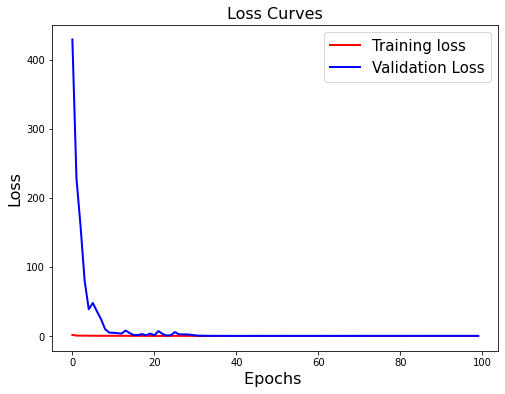

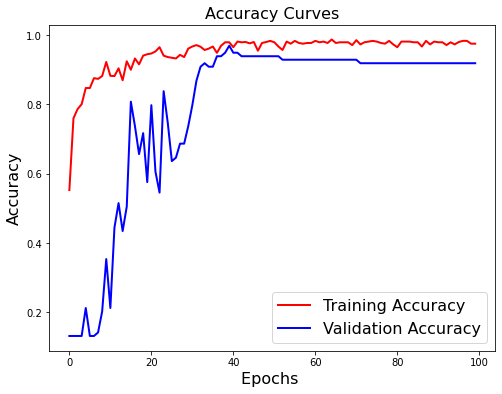

In [ ]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=2.0)
plt.plot(history.history['val_loss'],'b',linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=15)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=2.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=16)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
model1.load_weights('.mdl_wts.hdf5')

In [ ]:
pred_images,no_labels = get_images('/content/test_set/')
pred_images = np.array(pred_images)
pred_images.shape

(9025, 256, 256, 3)

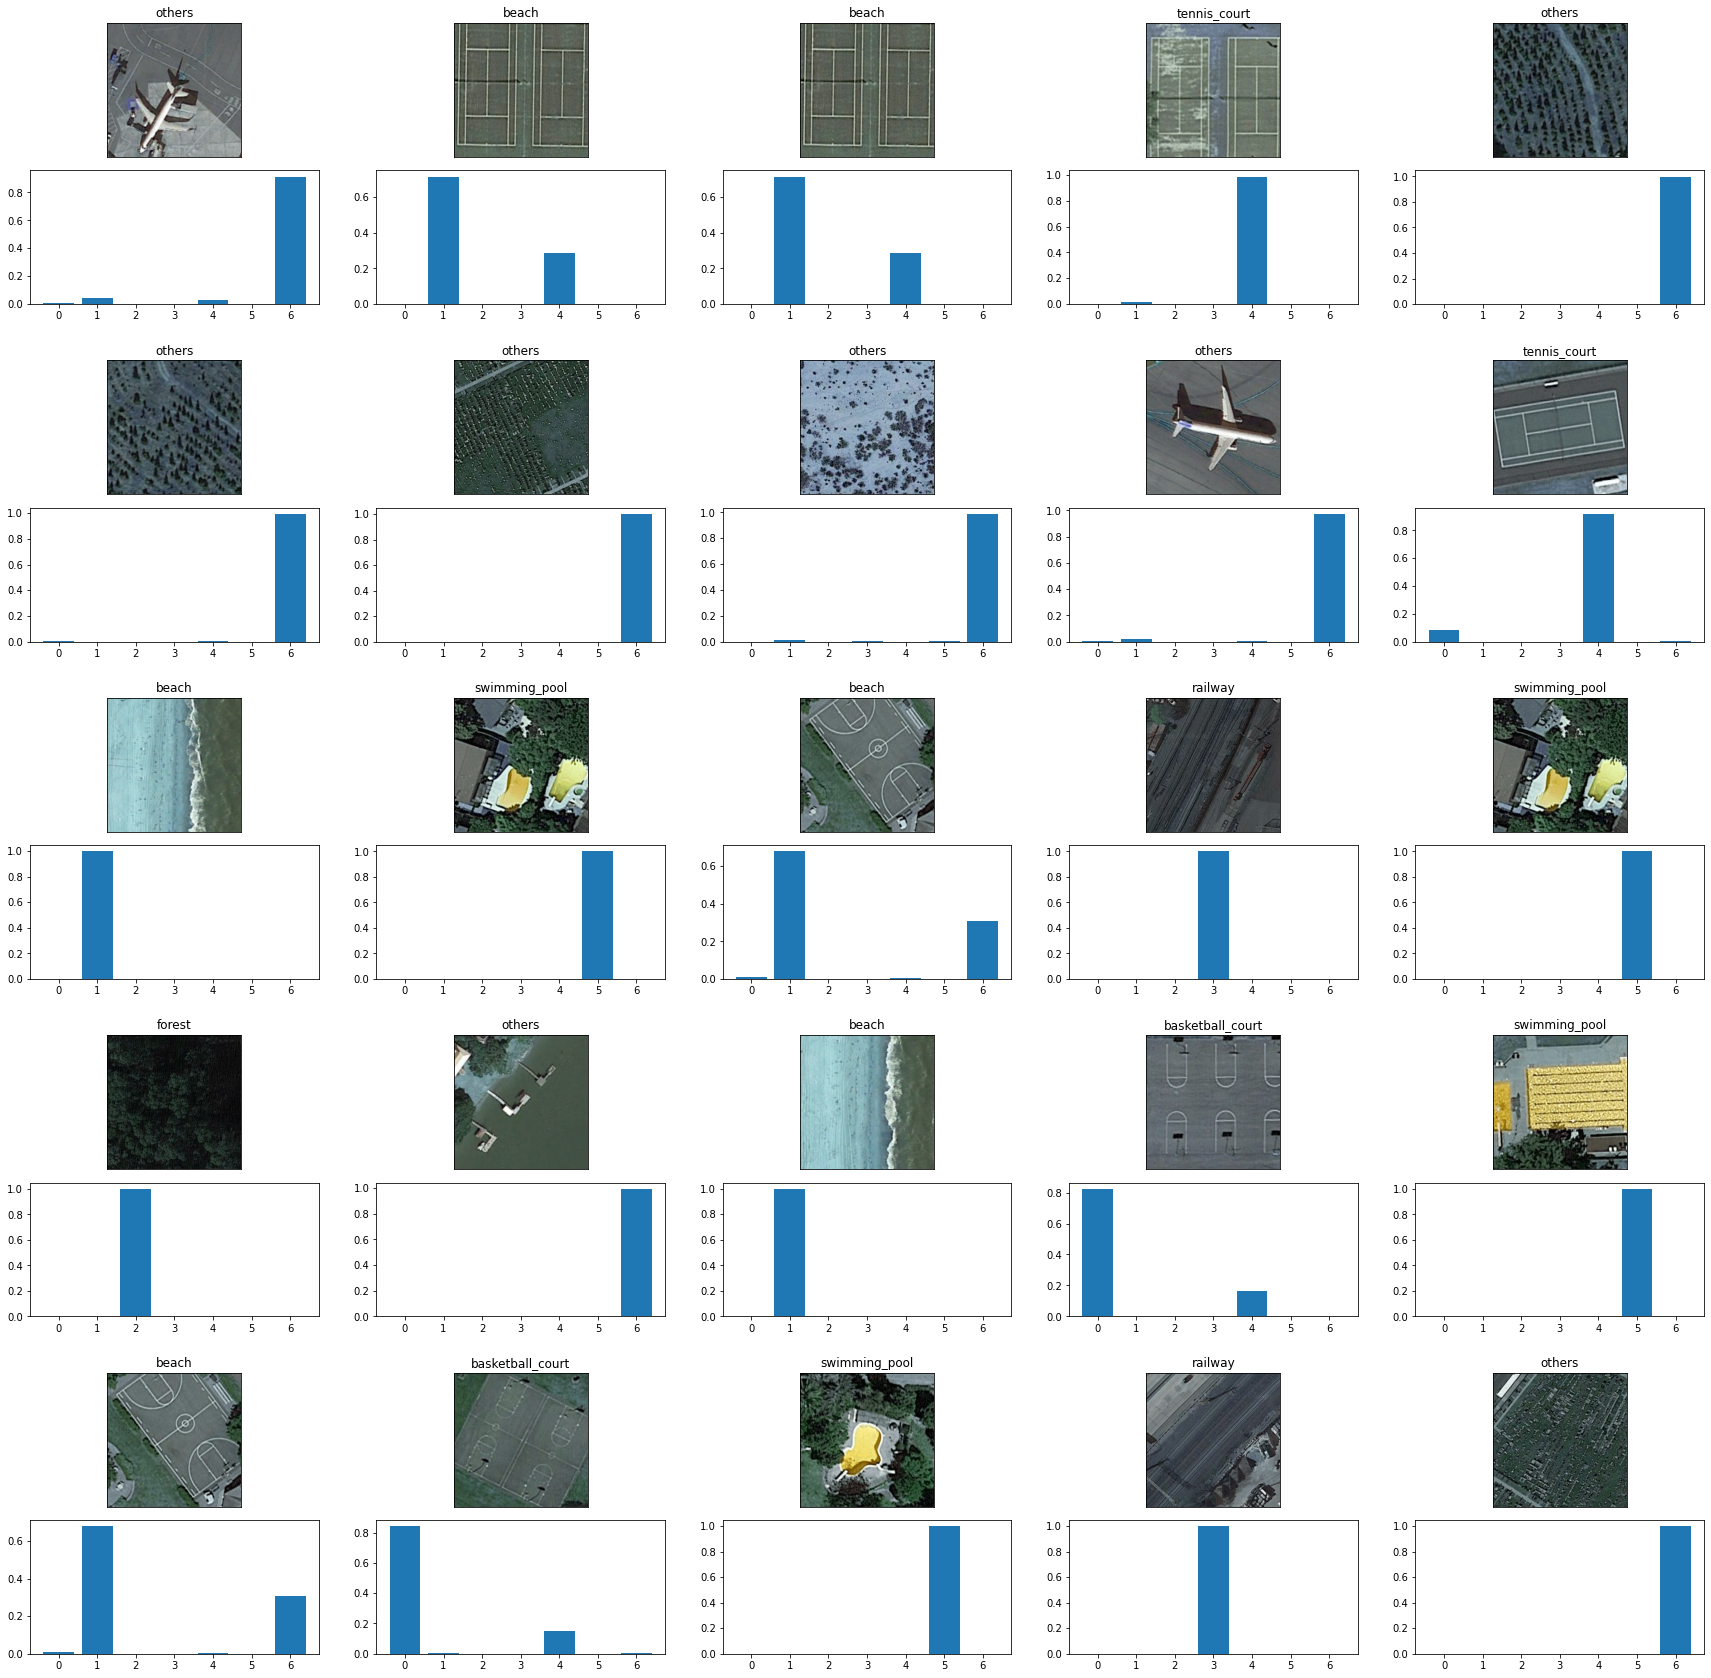

In [ ]:
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred_images))
#     print("rand number: "+str(rnd_number))
    pred_image = np.array([pred_images[rnd_number]])
#     print(pred_images[rnd_number])
    pred_class = get_classlabel(model1.predict_classes(pred_image)[0])
#     print(pred_class)
    pred_prob = model1.predict(pred_image).reshape(7)
    
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5,6],pred_prob)
            fig.add_subplot(ax)


fig.show()

In [ ]:
submission = pd.DataFrame()
a= []
b=[]

for img in os.listdir('/content/test_set/'):
    image = cv2.imread('/content/test_set/'+str(img)) 
    image = cv2.resize(image,(256,256)) 
    image = np.reshape(image,[1,256,256,3])
    a.append(img[0:4])
    b.append(model1.predict_classes(image)[0] +1)
    
    
submission['ImageID'] = a
submission['Label']= b
    
submission.to_csv('aym.csv', index=False)

In [ ]:
submission.head()

,ImageID,Label
0,1072,4
1,1061,7
2,1028,7
3,1011,7
4,1031,2


In [ ]:
submission.tail()

,ImageID,Label
90,1025,4
91,1079,3
92,1013,5
93,1020,7
94,1076,7
